In [1]:
"""
Template for week 9 project in Data Visualization

Read in two CSV files as dataframes using pandas
Join these two frames based on a common index
Overlay results on USA map
"""

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Resource paths
PLOTS_PATH = "plots/"
DATA_PATH = "data/"

# Headers for dataframes
FIPS, X_CENTER, Y_CENTER, POP, RISK = "FIPS", "x center", "y center", "population", "cancer risk"
COL_TYPES = {FIPS : "str", X_CENTER : "float", Y_CENTER : "float", POP : "int", RISK : "float"}
DATAFRAMES = {}


In [3]:
###################################################################################
# Part 1 - Load and manipulate dataframes 


def csv_to_dataframe(file_name, col_idxs, col_names, col_types):
    """
    Input: String file_name, list col_idxs of integers, 
    list col_names of strings, list col_types of types
    
    Output: Dataframe generated by reading the specified csv using pandas
    """
    data = pd.read_csv(file_name, header=None, usecols=col_idxs, names=col_names, 
                       dtype=col_types)
    
    return data

In [4]:
def test_csv_to_dataframe():
    """ Test csv_to_dataframe() """    

    col_idxs = [0, 1, 2]
    col_names = [FIPS, X_CENTER, Y_CENTER]
    DATAFRAMES["test_centers"] = csv_to_dataframe(DATA_PATH + "test.csv", 
                                                  col_idxs, col_names, COL_TYPES)
    print("Loaded test dataframe with", len(DATAFRAMES["test_centers"]), "county centers")
    print(DATAFRAMES["test_centers"].head())
    print()
    
    col_idxs = [0, 1, 2]
    col_names = [FIPS, X_CENTER, Y_CENTER]
    DATAFRAMES["all_centers"] = csv_to_dataframe(DATA_PATH + "USA_Counties.csv", 
                                                 col_idxs, col_names, COL_TYPES)
    print("Loaded centers dataframe with", len(DATAFRAMES["all_centers"]), "county centers")
    print(DATAFRAMES["all_centers"].head())
    print()
    
    col_idxs = [2, 4, 11]
    col_names = [FIPS, POP, RISK]
    DATAFRAMES["risks"] = csv_to_dataframe(DATA_PATH + "cancer_risk_raw.csv", 
                                           col_idxs, col_names, COL_TYPES)
    print("Loaded risks dataframe with", len(DATAFRAMES["risks"]), "cancer risk entries")      
    print(DATAFRAMES["risks"].head())
    print()
    

test_csv_to_dataframe()

Loaded test dataframe with 5 county centers
    FIPS    x center    y center
0  00000    0.500000    1.000000
1  00001    1.000000    0.500000
2  12345    1.500000    1.500000
3  01011  405.443150  245.671194
4  47021  385.228894  193.252379

Loaded centers dataframe with 3143 county centers
    FIPS    x center    y center
0  02185   73.851847  264.844023
1  02188   62.019282  278.311918
2  02130  141.912104  319.270889
3  02201  139.945631  320.219078
4  02280  135.736000  316.594968

Loaded risks dataframe with 3276 cancer risk entries
    FIPS  population  cancer risk
0      -   285339128     0.000050
1  01000     4447100     0.000049
2  01001       43671     0.000045
3  01003      140415     0.000037
4  01005       29038     0.000040



Correct output
~~~~
Loaded test dataframe with 5 county centers
    FIPS    x center    y center
0  00000    0.500000    1.000000
1  00001    1.000000    0.500000
2  12345    1.500000    1.500000
3  01011  405.443150  245.671194
4  47021  385.228894  193.252379

Loaded centers dataframe with 3143 county centers
    FIPS    x center    y center
0  02185   73.851847  264.844023
1  02188   62.019282  278.311918
2  02130  141.912104  319.270889
3  02201  139.945631  320.219078
4  02280  135.736000  316.594968

Loaded risks dataframe with 3276 cancer risk entries
    FIPS  population  cancer risk
0      -   285339128     0.000050
1  01000     4447100     0.000049
2  01001       43671     0.000045
3  01003      140415     0.000037
4  01005       29038     0.000040

~~~~

In [5]:
def merge_by_column(df1, df2, col_name):
    """
    Input: Dataframes df1, df2, string col_name
    
    Output: Dataframe formed by merging the input dataframes based
    on the specified shared column.  Returned rows must share
    a common entry in the specified column.
    """
    merged_df = pd.merge(df1, df2, on=col_name, how='inner')
    return merged_df

In [6]:
def test_merge_by_column():
    """ Test merge_by_column() """
    
    DATAFRAMES["test_merged"] = merge_by_column(DATAFRAMES["test_centers"], 
                                                DATAFRAMES["risks"], FIPS)
    print("Merged test and risks dataframe has", len(DATAFRAMES["test_merged"]), "entries")
    print(DATAFRAMES["test_merged"].head())
    print()
    
    DATAFRAMES["all_merged"] = merge_by_column(DATAFRAMES["all_centers"], 
                                               DATAFRAMES["risks"], FIPS)
    print("Merged centers and risks dataframe has", len(DATAFRAMES["all_merged"]), "entries")
    print(DATAFRAMES["all_merged"].head())
    
    
#     print("Writing merged data to cancer_risk_merged.csv")
#     DATAFRAMES["all_merged"].to_csv(DATA_PATH + "cancer_risk_merged.csv", index=False)
#     print()
    
test_merge_by_column()

Merged test and risks dataframe has 2 entries
    FIPS    x center    y center  population  cancer risk
0  01011  405.443150  245.671194       11714     0.000044
1  47021  385.228894  193.252379       35912     0.000040

Merged centers and risks dataframe has 3140 entries
    FIPS    x center    y center  population  cancer risk
0  02185   73.851847  264.844023        7385     0.000020
1  02188   62.019282  278.311918        7208     0.000017
2  02130  141.912104  319.270889       14070     0.000022
3  02201  139.945631  320.219078        6146     0.000018
4  02280  135.736000  316.594968        6684     0.000017


Correct output
~~~~
Merged test and risks dataframe has 2 entries
    FIPS    x center    y center  population  cancer risk
0  01011  405.443150  245.671194       11714     0.000044
1  47021  385.228894  193.252379       35912     0.000040

Merged centers and risks dataframe has 3140 entries
    FIPS    x center    y center  population  cancer risk
0  02185   73.851847  264.844023        7385     0.000020
1  02188   62.019282  278.311918        7208     0.000017
2  02130  141.912104  319.270889       14070     0.000022
3  02201  139.945631  320.219078        6146     0.000018
4  02280  135.736000  316.594968        6684     0.000017
~~~~

In [7]:
def get_high_risk(county_df, num_counties):
    """
    Input: Dataframe county_df, integer num_counties
    
    Output: Dataframe with num_counties rows consisting
    of counties with highest cancer risk. If num_counties
    is negative, return a dataframe consisting of countires
    with lowest cancer risk.
    
    NOTE: county_df should not be mutated
    """
    sorted_df = county_df.sort_values(by='cancer risk', ascending=False)
    
    if num_counties > 0:
        return sorted_df.head(num_counties)
    else:
        lowest_risk_df = sorted_df.tail(-num_counties)
        return lowest_risk_df.sort_values(by='cancer risk', ascending=False)
    


In [8]:
def test_get_high_risk():
    """ Test get_high_risk() """

    DATAFRAMES["test_risk_counties"] = get_high_risk(DATAFRAMES["test_merged"], 1)
    DATAFRAMES["low_risk_counties"] = get_high_risk(DATAFRAMES["all_merged"], -74)
    DATAFRAMES["high_risk_counties"] = get_high_risk(DATAFRAMES["all_merged"], 88)

test_get_high_risk()

## Question 1 (6 points)

Accounting for unexpected data during data cleaning is critical, especially when merging data from different sources. To this end, answer the following questions:
* How many rows  (specifed by their indices) do the `"all_centers"`, `"risks"`, and `"all_merged"` dataframes (generated by the test code) each contain?
* Which rows from the `"all_centers"` dataframe do not appear in the `"all_merged"` dataframe?

Insert Answer Here.

* Ans1:
    - all_centers: 3143 rows
    - risks: 3276 rows
    - all_merged: 3140
    
    
* Ans2:
    - 305, 3141, 3142

In [9]:
###################################################################################
# Provided code for part 2


SIZE_CONSTANT = math.pi / (200.0 ** 2)

def marker_size(population):
    """
    Input: Integer population
    
    Output: Area of circle in pixels proportional to population for use in plt.scatter()
    """
    return  SIZE_CONSTANT * population

In [10]:
MAX_LOG_RISK = math.log(1.50E-04, 10)    # maximum cancer risk in data
MIN_LOG_RISK = math.log(8.60E-06, 10)    # minimum cancer risk in data

def create_marker_color(color_map):
    """
    Input: Predefined color_map from matplotlib
    
    Output: Function that takes risk and returns color for use in plt.scatter()
    """
    
    # Note that this code is tricky and worth examining 
    risk_norm = mpl.colors.Normalize(vmin=MIN_LOG_RISK, vmax=MAX_LOG_RISK)
    color_mapper = mpl.cm.ScalarMappable(norm=risk_norm, cmap=color_map)
    
    # Return a function via a lambda expression
    return lambda risk: color_mapper.to_rgba(math.log(risk, 10))

In [11]:
##################################################################################
# Part 2 - Plot USA map and overlaying risk data

PIXELS_PER_INCH = 80
USA_SVG_SIZE = [555, 352]

# Default DPI for notebook graphics is 72, override for higher resolution images
# You can experiment with lower DPIs and see the resulting artifacts
mpl.rcParams['figure.dpi'] = 100

In [12]:
def plot_image(img_name, title="USA counties"):
    """
    Input: String img_name, optional string title
    
    Output: matplotlib figure of the specified USA map including the 
    specified title and specified size in inches as determined by PIXELS_PER_INCH
    """
    img = plt.imread(img_name)
    
    img_height, img_width = img.shape[:2]
    fig_width = img_width/PIXELS_PER_INCH
    fig_height = img_height/PIXELS_PER_INCH

    fig = plt.figure(figsize=(fig_width, fig_height))
    axs = fig.add_subplot()
    axs.imshow(img) 
    
    axs.set_xticks(range(0, img_width, int(PIXELS_PER_INCH)))
    axs.set_yticks(range(0, img_height, int(PIXELS_PER_INCH)))
    axs.set_title(title)
    
    return fig

Plotted USA map of size [12.5    7.925] in inches
Plotted USA map of size [10.4125  6.6   ] in inches
Plotted USA map of size [6.9375 4.4   ] in inches


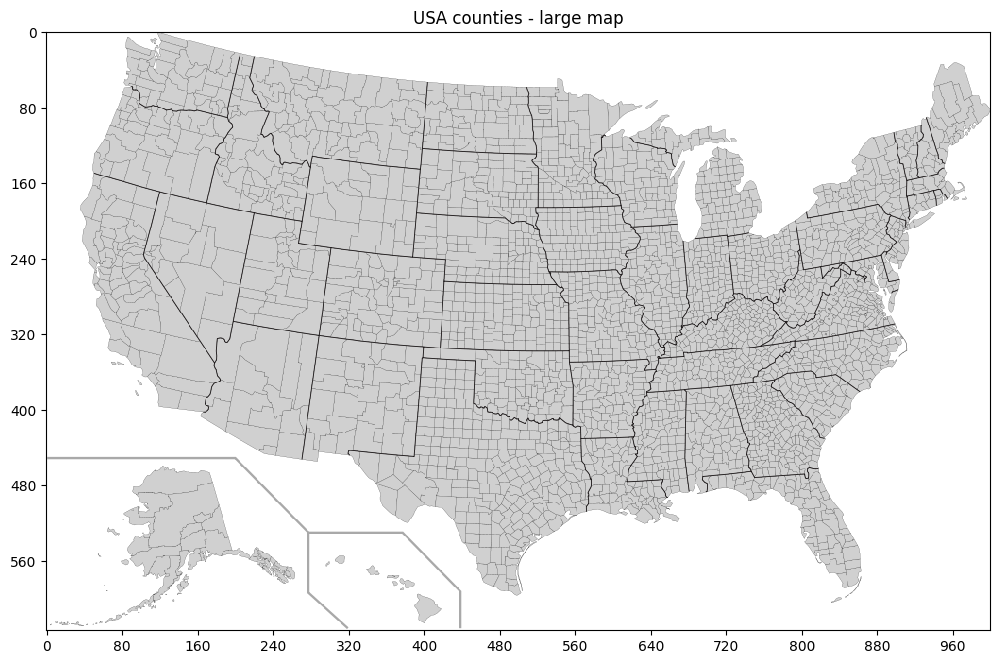

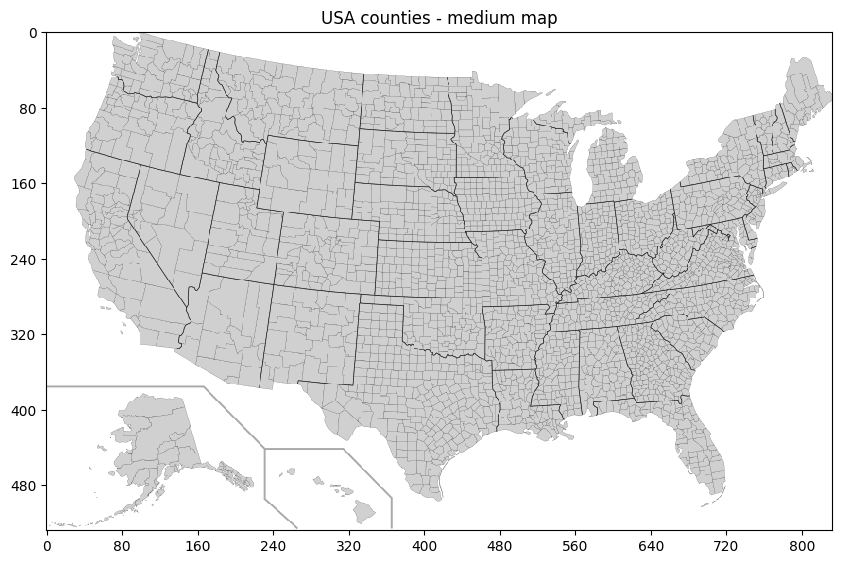

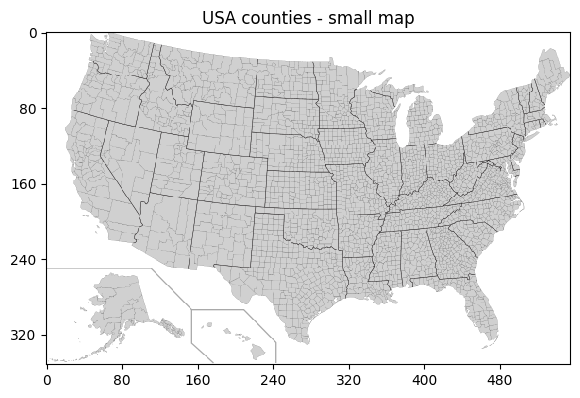

In [13]:
def test_plot_image():
    """ Test plot_image() """
    
    fig = plot_image(DATA_PATH + "USA_Counties_1000x634.png",
                      "USA counties - large map")
    print("Plotted USA map of size", fig.get_size_inches(), "in inches")
    
    fig = plot_image(DATA_PATH + "USA_Counties_833x528.png",
                      "USA counties - medium map")
    print("Plotted USA map of size", fig.get_size_inches(), "in inches")
    
    fig = plot_image(DATA_PATH + "USA_Counties_555x352.png",
                      "USA counties - small map")
    print("Plotted USA map of size", fig.get_size_inches(), "in inches")

test_plot_image()

Correct text output - Note that size should be (width x height) in inches

~~~~
Plotted USA map of size [12.5    7.925] in inches
Plotted USA map of size [10.4125  6.6   ] in inches
Plotted USA map of size [6.9375 4.4   ] in inches
~~~~

In [14]:
def plot_risk_map(risk_df, img_name, title="Cancer risk map"):
    """
    Input: Dataframe risk_df, string img_name, optional string title
    
    Output: matplotlib figure with USA county map specified by img_name overlaid 
    with cancer risk data plotted at corresponding county centers
    Uses the functions marker_size() and marker_color() to determine the size/colors
    of the circular markers
    """
    fig = plot_image(img_name, title)
    
    fig_width_pixels = fig.get_figwidth() * PIXELS_PER_INCH
    fig_height_pixels = fig.get_figheight() * PIXELS_PER_INCH

    x_coords = risk_df[X_CENTER] * (fig_width_pixels / USA_SVG_SIZE[0])
    y_coords = risk_df[Y_CENTER] * (fig_height_pixels / USA_SVG_SIZE[1])
    
    marker_sizes = [marker_size(population) for population in risk_df['population']]
    
    marker_colors = [create_marker_color(plt.get_cmap("jet"))
                     (risk) for risk in risk_df['cancer risk']]
    
    plt.scatter(x_coords, y_coords, s=marker_sizes, c=marker_colors, cmap="jet")
    
    plt.show()
    return fig

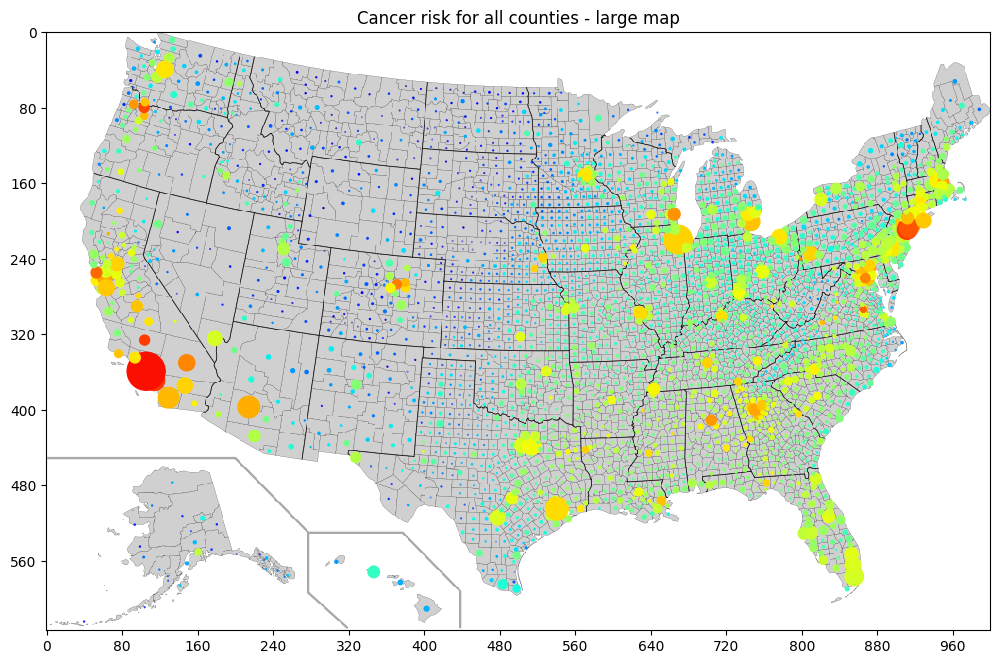

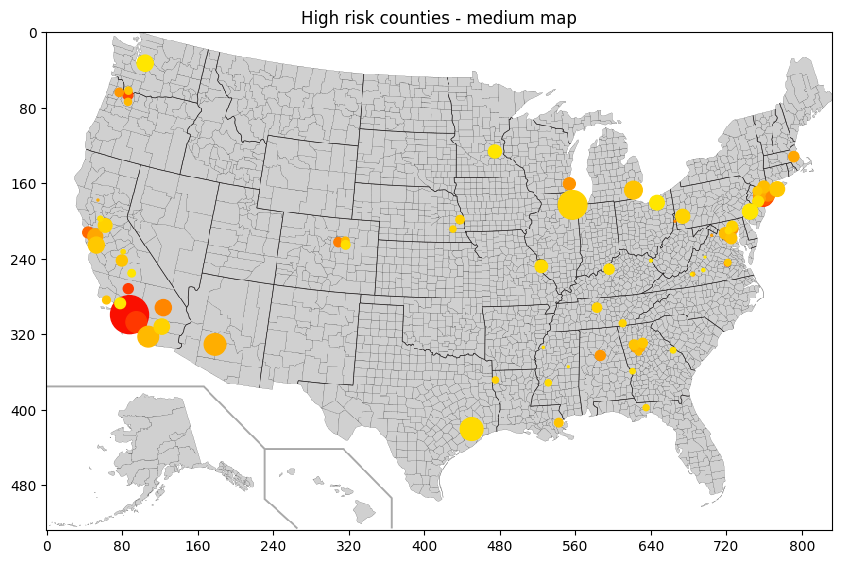

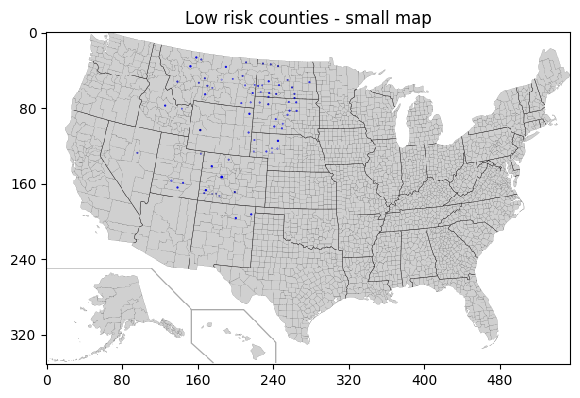

In [15]:
def test_plot_risk_map():
    """ Test plot_risk_map() """
    
    plot_risk_map(DATAFRAMES["all_merged"],
                  DATA_PATH + "USA_Counties_1000x634.png",
                  "Cancer risk for all counties - large map")
    
    plot_risk_map(DATAFRAMES["high_risk_counties"],
                  DATA_PATH + "USA_Counties_833x528.png",
                  "High risk counties - medium map")
    
    plot_risk_map(DATAFRAMES["low_risk_counties"],
                  DATA_PATH + "USA_Counties_555x352.png",
                  "Low risk counties - small map")     
    
    
test_plot_risk_map()